In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
imagem = cv2.imread("board1.png")
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Mostrar imagem original
plt.figure(figsize=(8, 8))
plt.title("Imagem Original")---------------------------------------------------------------------------
Exception                                 Traceback (most recent call last)
Cell In[31], line 26
     23 ret, corners = cv2.findChessboardCorners(imagem_gray, PADRAO_TABULEIRO, None)
     25 if not ret:
---> 26     raise Exception("Padrão interno do tabuleiro não encontrado. Verifique o PADRAO_TABULEIRO.")
     28 # Refinar cantos
     29 criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

Exception: Padrão interno do tabuleiro não encontrado. Verifique o PADRAO_TABULEIRO.
plt.imshow(imagem_rgb)
plt.axis("off")
plt.show()

In [25]:
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
borrada = cv2.GaussianBlur(cinza, (5, 5), 0)

# Detectar bordas com Canny
bordas = cv2.Canny(borrada, 50, 150)

# Encontrar contornos
contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Procurar o maior quadrilátero
contorno_tabuleiro = None
maior_area = 0

for contorno in contornos:
    perimetro = cv2.arcLength(contorno, True)
    aprox = cv2.approxPolyDP(contorno, 0.02 * perimetro, True)
    
    if len(aprox) == 4:
        area = cv2.contourArea(aprox)
        if area > maior_area:
            maior_area = area
            contorno_tabuleiro = aprox

# Mostrar erro se nada for encontrado
if contorno_tabuleiro is None:
    raise Exception("Tabuleiro não encontrado na imagem.")

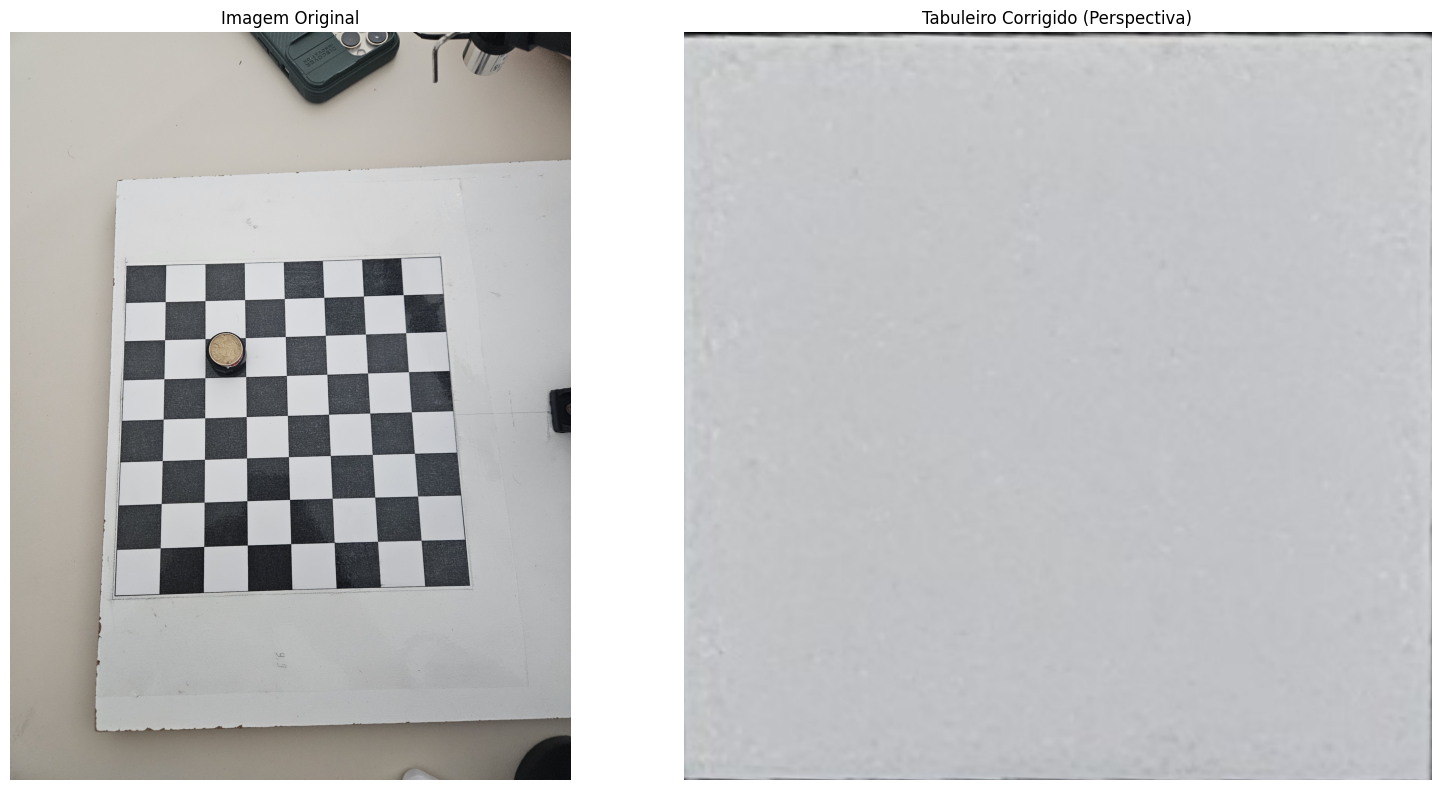

In [26]:
# Ordenar os pontos do contorno
def ordenar_pontos(pontos):
    pontos = pontos.reshape(4, 2)
    soma = pontos.sum(axis=1)
    diff = np.diff(pontos, axis=1)

    topo_esq = pontos[np.argmin(soma)]
    baixo_dir = pontos[np.argmax(soma)]
    topo_dir = pontos[np.argmin(diff)]
    baixo_esq = pontos[np.argmax(diff)]

    return np.array([topo_esq, topo_dir, baixo_dir, baixo_esq], dtype="float32")

# Aplicar warp perspective
pontos_ordenados = ordenar_pontos(contorno_tabuleiro)
largura = altura = 800

pontos_destino = np.array([
    [0, 0],
    [largura - 1, 0],
    [largura - 1, altura - 1],
    [0, altura - 1]
], dtype="float32")

matriz = cv2.getPerspectiveTransform(pontos_ordenados, pontos_destino)
warp = cv2.warpPerspective(imagem, matriz, (largura, altura))
warp_rgb = cv2.cvtColor(warp, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16, 8))

# Imagem original
plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(imagem_rgb)
plt.axis("off")

# Imagem corrigida
plt.subplot(1, 2, 2)
plt.title("Tabuleiro Corrigido (Perspectiva)")
plt.imshow(warp_rgb)
plt.axis("off")

plt.tight_layout()
plt.show()


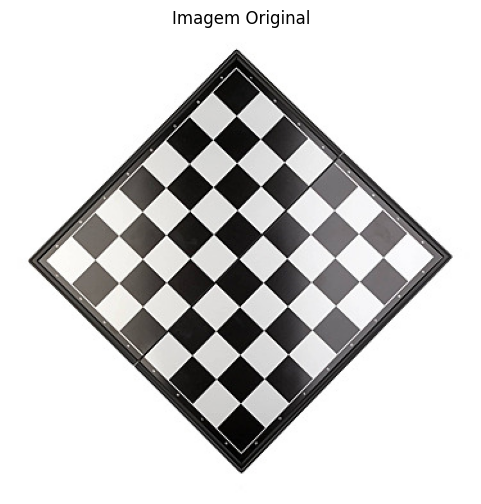

In [44]:
# Caminho da imagem
CAMINHO_IMAGEM = "board3.jpg"

# Carregar imagem com OpenCV
imagem = cv2.imread(CAMINHO_IMAGEM)

# Converter para RGB (para exibir com matplotlib)
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Mostrar imagem
plt.figure(figsize=(6, 6))
plt.title("Imagem Original")
plt.imshow(imagem_rgb)
plt.axis("off")
plt.show()


In [50]:
# Converter para escala de cinza
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Definir tamanho do padrão interno (número de cruzamentos)
PADRAO_TABULEIRO = (7, 7)  # para um tabuleiro 7x7 quadrados

# Detectar padrão de tabuleiro (cruzamentos entre quadrados)
ret, corners = cv2.findChessboardCorners(imagem_gray, PADRAO_TABULEIRO, None)

if not ret:
    raise Exception("⚠️ Padrão interno do tabuleiro não foi encontrado. Tente ajustar PADRAO_TABULEIRO.")


In [51]:
# Refinar os cantos com maior precisão subpixel
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
corners_refinados = cv2.cornerSubPix(imagem_gray, corners, (11, 11), (-1, -1), criteria)

# Desenhar os cantos detectados na imagem
imagem_cantos = imagem.copy()
cv2.drawChessboardCorners(imagem_cantos, PADRAO_TABULEIRO, corners_refinados, ret)

# Exibir imagem com cantos
plt.figure(figsize=(6, 6))
plt.title("Cantos do Tabuleiro Detectados")
plt.imshow(cv2.cvtColor(imagem_cantos, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


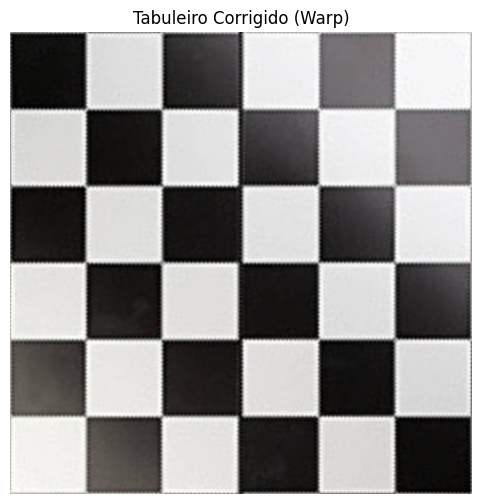

In [52]:
# Selecionar 4 cantos para fazer a transformação
pontos_src = np.array([
    corners_refinados[0][0],
    corners_refinados[PADRAO_TABULEIRO[0] - 1][0],
    corners_refinados[-1][0],
    corners_refinados[-PADRAO_TABULEIRO[0]][0]
], dtype="float32")

# Definir para onde queremos levar esses pontos (um quadrado reto)
LARGURA_WARP = 800
ALTURA_WARP = 800

pontos_dst = np.array([
    [0, 0],
    [LARGURA_WARP - 1, 0],
    [LARGURA_WARP - 1, ALTURA_WARP - 1],
    [0, ALTURA_WARP - 1]
], dtype="float32")

# Calcular matriz de transformação e aplicar warp
matriz = cv2.getPerspectiveTransform(pontos_src, pontos_dst)
warp = cv2.warpPerspective(imagem, matriz, (LARGURA_WARP, ALTURA_WARP))

# Mostrar imagem corrigida
plt.figure(figsize=(6, 6))
plt.title("Tabuleiro Corrigido (Warp)")
plt.imshow(cv2.cvtColor(warp, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


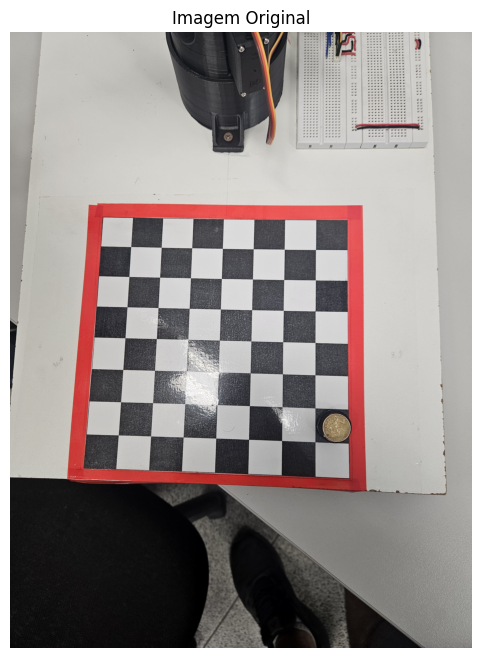

In [126]:
# Carregar imagem
imagem = cv2.imread("board/depois2.jpg")
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Mostrar imagem original
plt.figure(figsize=(8, 8))
plt.title("Imagem Original")
plt.imshow(imagem_rgb)
plt.axis("off")
plt.show()


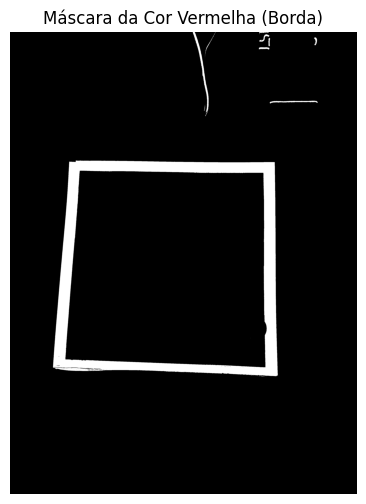

In [127]:
# Converter para HSV
hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

# Máscaras para tons de vermelho (vermelho está em 2 regiões no HSV)
limite1_inf = np.array([0, 100, 100])
limite1_sup = np.array([10, 255, 255])

limite2_inf = np.array([160, 100, 100])
limite2_sup = np.array([179, 255, 255])

# Combinar duas máscaras
mascara1 = cv2.inRange(hsv, limite1_inf, limite1_sup)
mascara2 = cv2.inRange(hsv, limite2_inf, limite2_sup)
mascara_vermelho = cv2.bitwise_or(mascara1, mascara2)

# Mostrar máscara da cor vermelha
plt.figure(figsize=(6, 6))
plt.title("Máscara da Cor Vermelha (Borda)")
plt.imshow(mascara_vermelho, cmap='gray')
plt.axis("off")
plt.show()


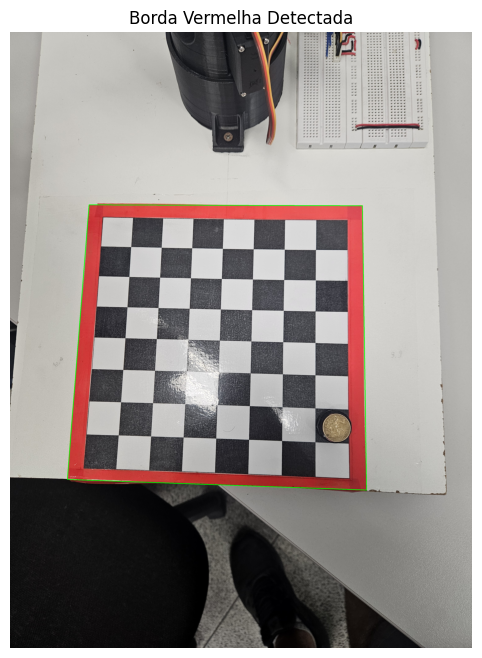

In [128]:
# Encontrar contornos na máscara
contornos, _ = cv2.findContours(mascara_vermelho, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Selecionar maior contorno com 4 lados (quadrilátero)
maior_area = 0
contorno_borda = None

for contorno in contornos:
    perimetro = cv2.arcLength(contorno, True)
    aprox = cv2.approxPolyDP(contorno, 0.02 * perimetro, True)
    
    if len(aprox) == 4:
        area = cv2.contourArea(aprox)
        if area > maior_area:
            maior_area = area
            contorno_borda = aprox

# Verificar se encontrou
if contorno_borda is None:
    raise Exception("❌ Borda vermelha não detectada.")

# Mostrar imagem com contorno
imagem_borda = imagem_rgb.copy()
cv2.drawContours(imagem_borda, [contorno_borda], -1, (0, 255, 0), 4)

plt.figure(figsize=(8, 8))
plt.title("Borda Vermelha Detectada")
plt.imshow(imagem_borda)
plt.axis("off")
plt.show()


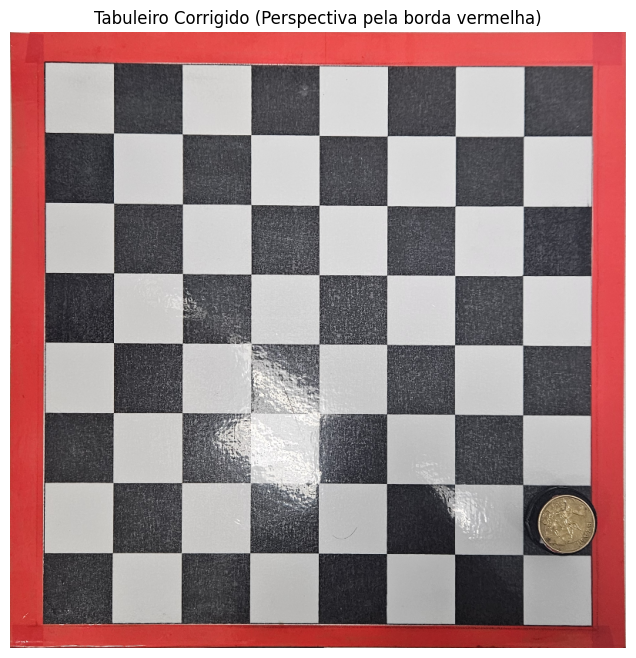

True

In [129]:
def ordenar_pontos(pontos):
    pontos = pontos.reshape(4, 2)
    soma = pontos.sum(axis=1)
    diff = np.diff(pontos, axis=1)

    topo_esq = pontos[np.argmin(soma)]
    baixo_dir = pontos[np.argmax(soma)]
    topo_dir = pontos[np.argmin(diff)]
    baixo_esq = pontos[np.argmax(diff)]

    return np.array([topo_esq, topo_dir, baixo_dir, baixo_esq], dtype="float32")

# Corrigir perspectiva
pontos_ordenados = ordenar_pontos(contorno_borda)
largura = altura = 800

pontos_destino = np.array([
    [0, 0],
    [largura - 1, 0],
    [largura - 1, altura - 1],
    [0, altura - 1]
], dtype="float32")

matriz = cv2.getPerspectiveTransform(pontos_ordenados, pontos_destino)
warp = cv2.warpPerspective(imagem, matriz, (largura, altura))
warp_rgb = cv2.cvtColor(warp, cv2.COLOR_BGR2RGB)

# Mostrar imagem retificada
plt.figure(figsize=(8, 8))
plt.title("Tabuleiro Corrigido (Perspectiva pela borda vermelha)")
plt.imshow(warp_rgb)
plt.axis("off")
plt.show()

cv2.imwrite("tabuleiro_corrigido.jpg", warp)


In [130]:
# Carregar a imagem
# Substitua 'caminho_da_sua_imagem.jpg' pelo caminho real da sua imagem
img = cv2.imread('antes2.jpg')

# OpenCV carrega em BGR, converter para RGB para exibição correta
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Visualizar a imagem original
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title('Imagem Original')
plt.axis('off')
plt.show()

print(f"Dimensões da imagem: {img.shape}")

Dimensões da imagem: (800, 800, 3)


In [131]:
# Converter para HSV para melhor detecção de cor
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Visualizar os canais HSV
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(hsv[:,:,0], cmap='hsv')
axes[0].set_title('Canal H (Matiz)')
axes[0].axis('off')

axes[1].imshow(hsv[:,:,1], cmap='gray')
axes[1].set_title('Canal S (Saturação)')
axes[1].axis('off')

axes[2].imshow(hsv[:,:,2], cmap='gray')
axes[2].set_title('Canal V (Valor)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

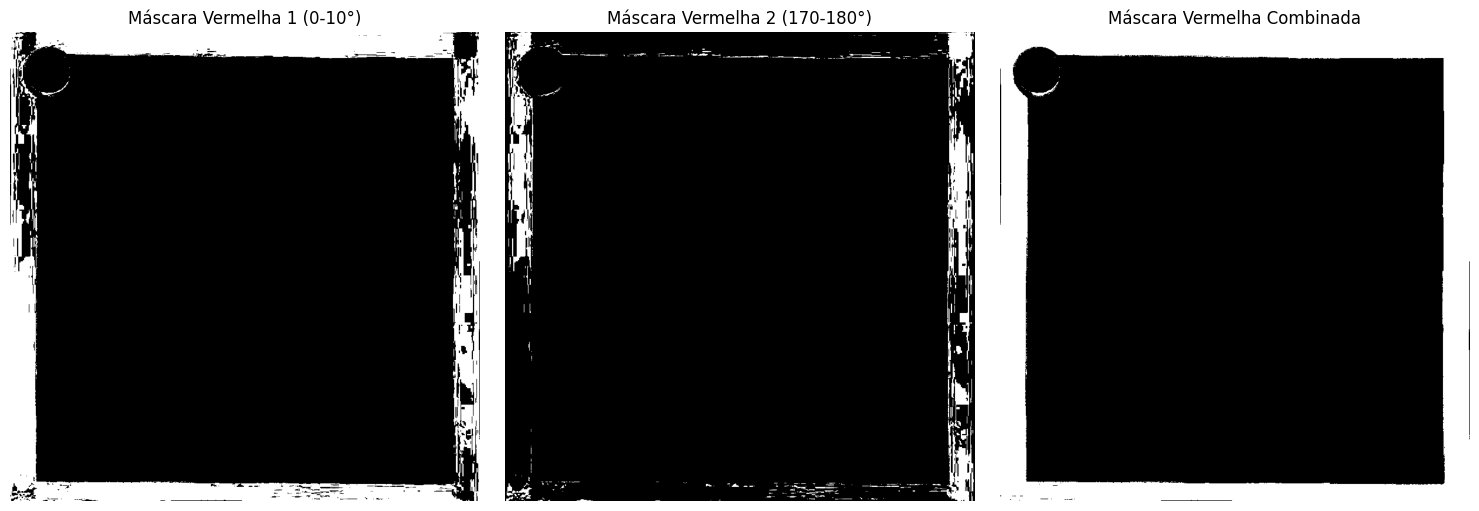

In [132]:
# Definir ranges para cor vermelha no HSV
# Vermelho pode estar em duas faixas no HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Criar máscaras para vermelho
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = mask1 + mask2

# Visualizar as máscaras
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(mask1, cmap='gray')
axes[0].set_title('Máscara Vermelha 1 (0-10°)')
axes[0].axis('off')

axes[1].imshow(mask2, cmap='gray')
axes[1].set_title('Máscara Vermelha 2 (170-180°)')
axes[1].axis('off')

axes[2].imshow(red_mask, cmap='gray')
axes[2].set_title('Máscara Vermelha Combinada')
axes[2].axis('off')

plt.tight_layout()
plt.show()

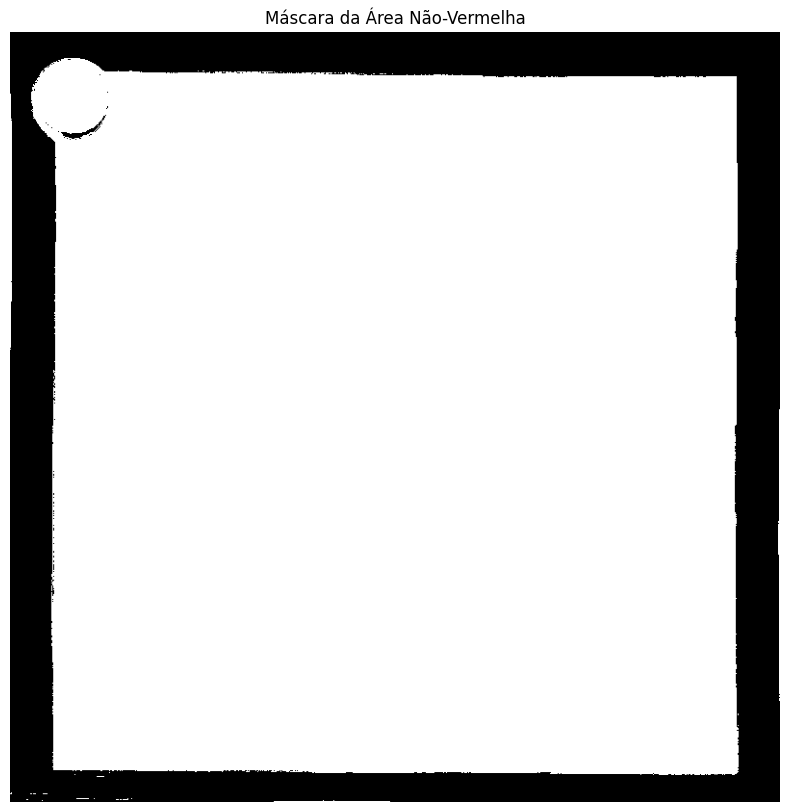

In [133]:
# Inverter a máscara (queremos o que NÃO é vermelho)
non_red_mask = cv2.bitwise_not(red_mask)

plt.figure(figsize=(10, 10))
plt.imshow(non_red_mask, cmap='gray')
plt.title('Máscara da Área Não-Vermelha')
plt.axis('off')
plt.show()

In [134]:
# Encontrar contornos da área não-vermelha
contours_v2, _ = cv2.findContours(non_red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Encontrar o maior contorno
largest_contour_v2 = max(contours_v2, key=cv2.contourArea)

# Obter o retângulo delimitador
x2, y2, w2, h2 = cv2.boundingRect(largest_contour_v2)

# Adicionar uma pequena margem
margin = 5
x2 = max(0, x2 - margin)
y2 = max(0, y2 - margin)
w2 = min(img.shape[1] - x2, w2 + 2*margin)
h2 = min(img.shape[0] - y2, h2 + 2*margin)

print(f"Coordenadas ajustadas: x={x2}, y={y2}, largura={w2}, altura={h2}")

Coordenadas ajustadas: x=17, y=22, largura=745, altura=755


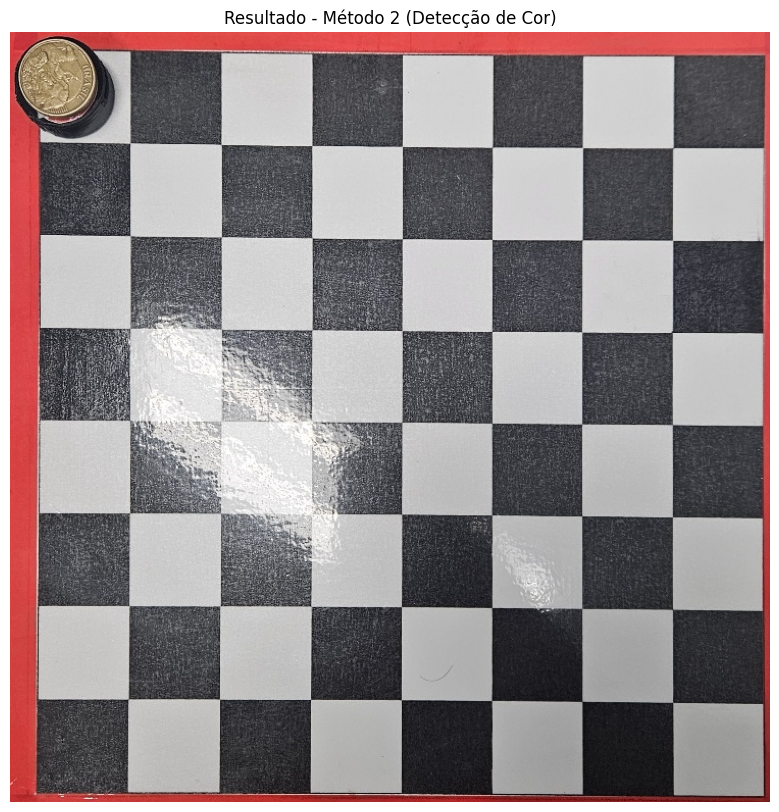

True

In [135]:
# Recortar a imagem usando o método 2
cropped_v2 = img_rgb[y2:y2+h2, x2:x2+w2]

plt.figure(figsize=(10, 10))
plt.imshow(cropped_v2)
plt.title('Resultado - Método 2 (Detecção de Cor)')
plt.axis('off')
plt.show()
cv2.imwrite("tabuleiro_corrigido.jpg", cropped_v2)
